In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-02.parquet')
df_mar = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-03.parquet')
df_apr = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-04.parquet')
df_may = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-05.parquet')
df_jun = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-06.parquet')

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

### Read the data for January. How many columns are there?

In [4]:
len(df.columns)

19

In [5]:
df.shape

(3066766, 19)

# Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [6]:
df['tpep_dropoff_dt'] = pd.to_datetime(df.tpep_dropoff_datetime)
df['tpep_pickup_dt'] = pd.to_datetime(df.tpep_pickup_datetime)

In [7]:
df['duration'] = df.tpep_dropoff_dt - df.tpep_pickup_dt

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,tpep_dropoff_dt,tpep_pickup_dt,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,0.5,0.00,0.0,1.0,14.30,2.5,0.00,2023-01-01 00:40:36,2023-01-01 00:32:10,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,0.5,4.00,0.0,1.0,16.90,2.5,0.00,2023-01-01 01:01:27,2023-01-01 00:55:08,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,0.5,15.00,0.0,1.0,34.90,2.5,0.00,2023-01-01 00:37:49,2023-01-01 00:25:04,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,0.5,0.00,0.0,1.0,20.85,0.0,1.25,2023-01-01 00:13:25,2023-01-01 00:03:48,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,0.5,3.28,0.0,1.0,19.68,2.5,0.00,2023-01-01 00:21:19,2023-01-01 00:10:29,0 days 00:10:50


In [9]:
# calculate trip duration in minutes: 
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [10]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [11]:
4.259435e+01

42.59435

# Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

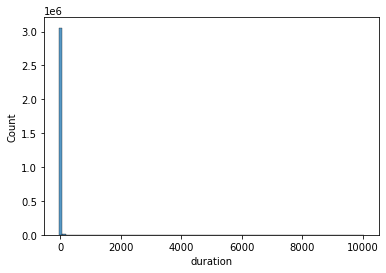

In [12]:
# distribution before cleaning
sns.histplot(df['duration'], bins=100)
plt.show()

In [13]:
# drop records that are outside 1 and 60 min
df_clean = df[(df['duration'] >=1) & (df['duration'] <= 60)].copy()

In [14]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

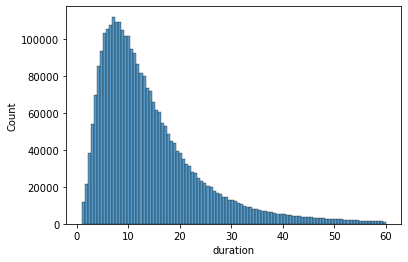

In [15]:
# distribution after cleaning
sns.histplot(df_clean['duration'], bins=100)
plt.show()

In [16]:
# fraction of records left:
len(df_clean)/len(df)

0.9812202822125979

In [17]:
df_clean.duration.describe()

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [18]:
df_clean.duration.min()

1.0

In [19]:
df_clean.duration.max()

60.0

# Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)  
Fit a dictionary vectorizer  
Get a feature matrix from it  
What's the dimensionality of this matrix (number of columns)?

In [20]:
# this creates a view! so you have to do .copy() later
df_model = df_clean[['PULocationID','DOLocationID']]
df_model.head()

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79


In [21]:
# cast ID to string
df_model = df_model.copy()
df_model.loc[:, 'PULocationID'] = df_model['PULocationID'].astype(str)
df_model.loc[:, 'DOLocationID'] = df_model['DOLocationID'].astype(str)

In [22]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)
# Use sparse=False if you want a dense NumPy array as output
#(e.g., for training with regression models).
#This returns a sparse matrix (lightweight, memory-efficient), 
#which is totally fine for scikit-learn models like LinearRegression.

In [23]:
# convert df rows to list of dictionaries:
categorical = df_model[['PULocationID', 'DOLocationID']].to_dict(orient='records')

In [24]:
categorical

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'},
 {'PULocationID': '161', 'DOLocationID': '137'},
 {'PULocationID': '239', 'DOLocationID': '143'},
 {'PULocationID': '142', 'DOLocationID': '200'},
 {'PULocationID': '164', 'DOLocationID': '236'},
 {'PULocationID': '141', 'DOLocationID': '107'},
 {'PULocationID': '234', 'DOLocationID': '68'},
 {'PULocationID': '79', 'DOLocationID': '264'},
 {'PULocationID': '164', 'DOLocationID': '143'},
 {'PULocationID': '138', 'DOLocationID': '33'},
 {'PULocationID': '33', 'DOLocationID': '61'},
 {'PULocationID': '79', 'DOLocationID': '186'},
 {'PULocationID': '90', 'DOLocationID': '48'},
 {'PULocationID': '113', 'DOLocationID': '255'},
 {'PULocationID': '237', 'DOLocationID': '239'},
 {'PULocationID': '143', 'DOLocationID': '229'},
 {'PULocationID': '137', 'DOLocat

In [25]:
# fit and transform the data 
X = dv.fit_transform(categorical)

In [26]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [27]:
# number of columns: 515
X.shape

(3009173, 515)

# Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?